In [21]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [22]:
img_dir = "../../DIP3E_Original_Images_CH03"
img = Image.open(f"{img_dir}/Fig0334(a)(hubble-original).tif")
img = np.asarray(img)

In [23]:
def smooth_img(img, kernel_size):
    height, width = img.shape
    kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
    smoothed_image = np.zeros((height, width), dtype = np.float32)

    kernel_iter = kernel_size // 2
    for i in range(kernel_iter, height - kernel_iter):
        for j in range(kernel_iter, width - kernel_iter):
            neighborhood = img[i - kernel_iter: i + kernel_iter + 1, j - kernel_iter: j + kernel_iter + 1]

            smoothed_pixel = np.sum(neighborhood * kernel)
            smoothed_image[i, j] = smoothed_pixel
    
    return smoothed_image

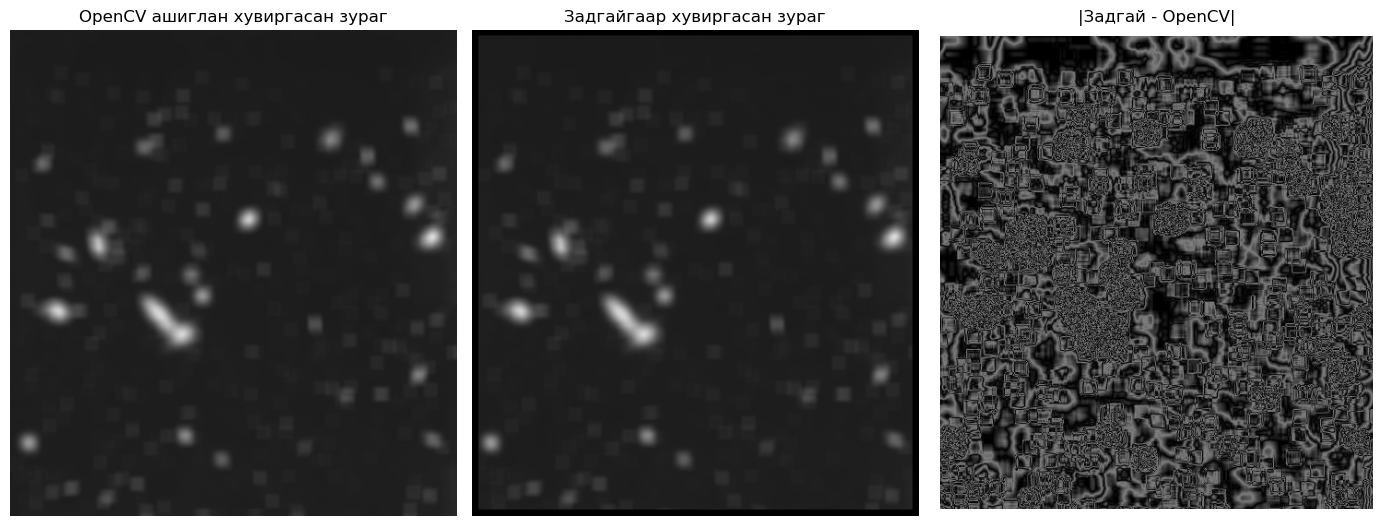

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (14, 12))

kernel_size = 15
kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / (kernel_size ** 2)
smoothed_image_cv = cv2.filter2D(img, -1, kernel)

smoothed_image = smooth_img(img, kernel_size)

axes[0].imshow(smoothed_image_cv, cmap = 'gray', vmin = 0, vmax = 255)
axes[1].imshow(smoothed_image, cmap = 'gray', vmin = 0, vmax = 255)
img_diff = abs(smoothed_image - smoothed_image_cv)*255
axes[2].imshow(img_diff, cmap = 'gray', vmin = 0, vmax = 255)

axes[0].axis('off')
axes[0].set_title("OpenCV ашиглан хувиргасан зураг")
axes[1].axis('off')
axes[1].set_title("Задгайгаар хувиргасан зураг")
axes[2].axis('off')
axes[2].set_title("|Задгай - OpenCV|")

fig.tight_layout()
fig.savefig("./plots/smoothing_thresh.png")

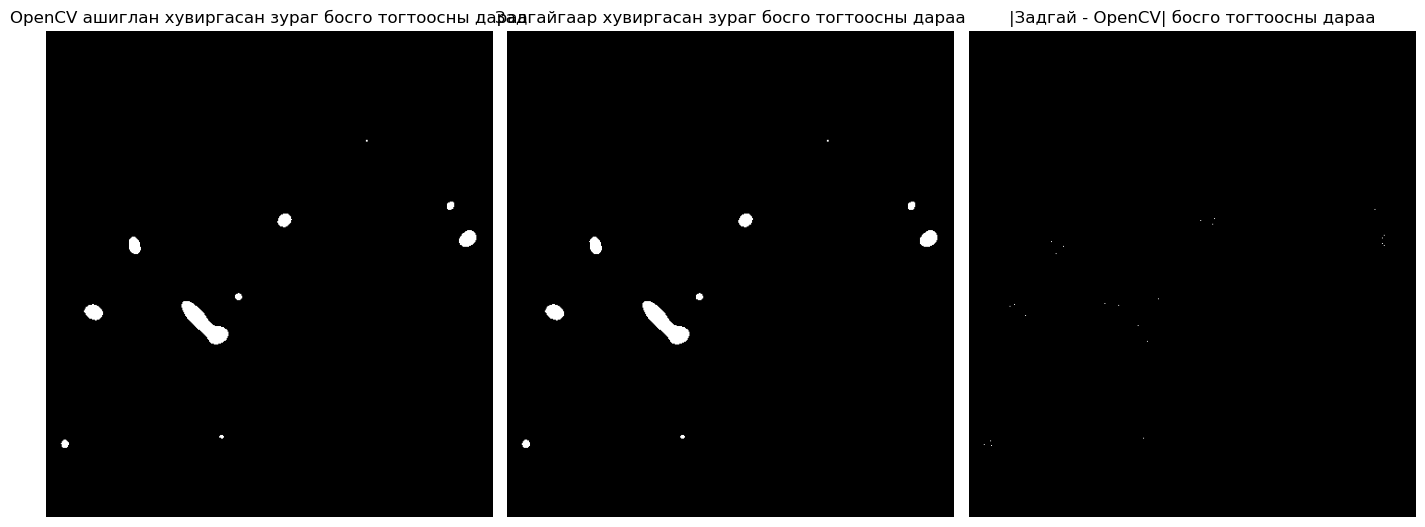

In [25]:
fig, axes = plt.subplots(1, 3, figsize = (14, 12))

thresh = 128
smoothed_image_cv_thresh = (smoothed_image_cv > thresh)*1
smoothed_image_thresh = (smoothed_image > thresh)*1

axes[0].imshow(smoothed_image_cv_thresh, cmap = 'gray')
axes[1].imshow(smoothed_image_thresh, cmap = 'gray')
img_diff = abs(smoothed_image_thresh - smoothed_image_cv_thresh)*255
axes[2].imshow(img_diff, cmap = 'gray')

axes[0].axis('off')
axes[0].set_title("OpenCV ашиглан хувиргасан зураг босго тогтоосны дараа")
axes[1].axis('off')
axes[1].set_title("Задгайгаар хувиргасан зураг босго тогтоосны дараа")
axes[2].axis('off')
axes[2].set_title("|Задгай - OpenCV| босго тогтоосны дараа")

fig.tight_layout()
fig.savefig("./plots/smoothing_thresh_1.png")